# Feature Engineering

In [1]:
# Import dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
from tqdm import tqdm
import tensorflow as tf
from keras.preprocessing.image import img_to_array
from PIL import Image

In [2]:
# Retrieve the audio files
audio_path = "../resources/audio_files/"
audio_files = os.listdir(audio_path)

## Spectrograms

Creating spectrograms: 100%|██████████████████| 209/209 [08:02<00:00,  2.31s/it]


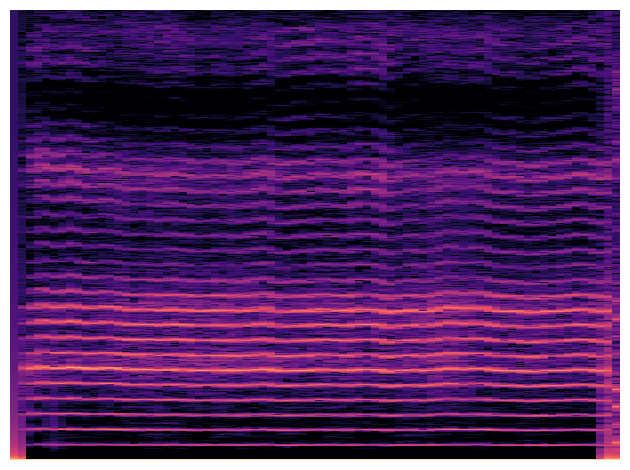

In [3]:
# Create the spectrograms
for file in tqdm(audio_files, desc="Creating spectrograms"):
    
    # Only read .wav files
    if file.endswith(".wav"):
        
        # Load the file
        y, sr = librosa.load(
            audio_path + file, # full file path
            sr = None # preserve sampling rate
        )

        # Plot the spectrogram
        D = librosa.amplitude_to_db(
            np.abs(librosa.stft(y)),
            ref = np.max
        )

        # Plot the spectrogram
        librosa.display.specshow(
            D,
            sr = sr,
            x_axis = 'time',
            y_axis = 'linear' # can also choose: linear
        )
        
        # Define the filename
        filename = file.split(".")[0]

        # Remove labels and border
        plt.tight_layout()
        plt.axis('off')
        
        # Export image
        plt.savefig(
            f'../resources/spectrograms/linear/{filename}.png',
            bbox_inches = 'tight',
            pad_inches = 0
        )

In [4]:
# Define the image path and files
image_path = "../resources/spectrograms/linear/"
image_files = os.listdir(image_path)

In [19]:
# Resize each image
new_width, new_height = 305, 225

for image_name in tqdm(image_files, desc="Resizing spectrograms"):
    
    # Only read .png files
    if image_name.endswith(".png"):
        
        # Open the image file
        img = Image.open(image_path + image_name)
        
        # Resize
        resized = img.resize((new_width, new_height))
        
        # Create a new figure
        plt.figure(figsize=(new_width / 100, new_height / 100))
        
        # Plot the resized image
        plt.imshow(resized)

        # Define the filename
        filename = image_name.split(".")[0]
        
        # Remove labels and border
        plt.tight_layout()
        plt.axis('off')
        
        # Export image
        plt.savefig(
            f'../resources/spectrograms/resized/{filename}.png',
            bbox_inches = 'tight',
            pad_inches = 0
        )
        
        # Close the figure to avoid runtime warning
        plt.close()

Resizing spectrograms: 100%|██████████████████| 208/208 [00:10<00:00, 19.92it/s]


In [25]:
# Define the resized image path and files
resized_path = "../resources/spectrograms/resized/"
resized_files = os.listdir(resized_path)

In [30]:
# Initialise a list to hold the dictionaries
spectro_list = []
id_list = []
r_list = []
g_list = []
b_list = []
a_list = []

# Loop through each image
for resized_image in resized_files[:3]:
    
    # Only read .png files
    if image_name.endswith(".png"):
        
        # Initialise a dictionary to hold the pixels
        spectro_dict = dict()

        # Open the image file
        img = Image.open(resized_path + resized_image)

        # Convert image to array format
        img_array = img_to_array(img)
        
        # Add image attributes and array to dictionary
        spectro_dict['id'] = resized_image.split(".")[0]
        spectro_dict['format'] = img.format
        spectro_dict['mode'] = img.mode
        spectro_dict['width_px'] = img.width
        spectro_dict['height_px'] = img.height
        
        id_list.append(resized_image.split(".")[0])
        r_list.append(img_array[:, :, 0].flatten().astype(int))
        g_list.append(img_array[:, :, 1].flatten().astype(int))
        b_list.append(img_array[:, :, 2].flatten().astype(int))
        a_list.append(img_array[:, :, 3].flatten().astype(int))
        
        spectro_list.append(spectro_dict)

# Create a list of RGBA lists
rgba_list = [r_list, g_list, b_list, a_list]

# Convert the list to a DataFrame
spectro_df = pd.DataFrame(spectro_list)
spectro_df.head()

,id,format,mode,width_px,height_px
0,voice156,PNG,RGBA,225,166
1,voice142,PNG,RGBA,225,166
2,voice195,PNG,RGBA,225,166


In [36]:
# Colour reference list
colours = ['r', 'g', 'b', 'a']

for idx, colour_list in tqdm(enumerate(rgba_list), desc="Exporting as CSV"):
    
    # Create a dataframe of each colour
    df = pd.DataFrame(colour_list)
    
    # Use id as the index to the dataframe
    df.index = id_list

    # Move the column to the front
    # id_col = df.pop('id')
    # df.insert(0, 'id', id_col)
    
    display(df.transpose())
    
    # # Export to CSV
    # df.to_csv(
    #     f'../resources/clean_data/{colours[idx]}val.csv',
    #     encoding = 'utf8',
    #     index = False
    # )

Exporting as CSV: 0it [00:00, ?it/s]

,voice156,voice142,voice195
0,46,47,47
1,46,47,47
2,43,44,44
3,24,22,22
4,22,20,20
...,...,...,...
37345,243,227,246
37346,242,243,249
37347,242,242,249
37348,250,250,250


Exporting as CSV: 1it [00:00,  3.35it/s]

,voice156,voice142,voice195
0,17,17,17
1,17,17,17
2,16,16,16
3,14,14,14
4,14,14,13
...,...,...,...
37345,139,132,150
37346,138,138,155
37347,139,139,154
37348,151,151,153


Exporting as CSV: 2it [00:00,  3.45it/s]

,voice156,voice142,voice195
0,98,99,99
1,98,99,99
2,94,94,95
3,60,57,58
4,58,55,55
...,...,...,...
37345,117,115,117
37346,118,118,116
37347,117,117,115
37348,113,113,113


Exporting as CSV: 3it [00:00,  3.49it/s]

,voice156,voice142,voice195
0,255,255,255
1,255,255,255
2,255,255,255
3,255,255,255
4,255,255,255
...,...,...,...
37345,255,255,255
37346,255,255,255
37347,255,255,255
37348,255,255,255


Exporting as CSV: 4it [00:01,  3.21it/s]
